<span>
<b>Author:</b> <a href="http://about.giuliorossetti.net">Giulio Rossetti</a><br/>
<b>Python version:</b>  >=3.7<br/>
<b>Networkx version:</b>  >=2.3<br/>
<b>Last update:</b> 16/02/2021
</span>

<a id='top'></a>
# *Chapter 6: Centrality & Assortative Mixing*

In this notebook are introduced basilar analysis to cover node centrality and assortative mixing.

**Note:** this notebook is purposely not 100% comprehensive, it only discusses the basic things you need to get started. 

In [1]:
import networkx as nx
import warnings
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline 

In [3]:
# Game of Thrones Season 7
g = nx.read_edgelist('data/gs7.edgelist')

# simulate node attributes
labels = ['0', '1']
for n in g.nodes():
    g.add_node(n, label=random.choice(labels))

# node position for plotting
pos = nx.spring_layout(g)

In [42]:
# Support function to plot networks (only small graphs)
def draw_net(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

## Centrality measures

We can measure nodes importance using so-called centrality.

**Bad term:** 
- nothing to do with being central in general

**Usage:**
- Some centralities have straightforward interpretation
- Centralities can be used as node features for machine learning on graph


Node centrality measures can be easily computed in python using ``networkx`` as follows

### Degree Centrality

How many neighbors does a node have?

In [5]:
degrees = dict(g.degree()) # compute the degree of a set of nodes (if specified).

In [35]:
ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
ranks[0:5]

[('JON', 43), ('TYRION', 34), ('DAENERYS', 34), ('CERSEI', 31), ('DAVOS', 27)]

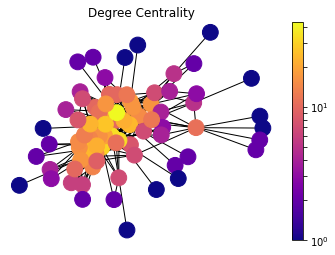

In [6]:
draw_net(g, pos, degrees, 'Degree Centrality')

### Closeness Centrality

**Farness:** average of length of shortest paths to all other nodes

**Closeness:** inverse of the Farness  (normalized by number of nodes)


In [7]:
closeness = nx.closeness_centrality(g) # compute the closeness centraliry of all nodes 

In [37]:
ranks = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]
ranks[0:5]

[('JON', 0.6611570247933884),
 ('TYRION', 0.6015037593984962),
 ('DAENERYS', 0.5882352941176471),
 ('CERSEI', 0.5755395683453237),
 ('DAVOS', 0.5594405594405595)]

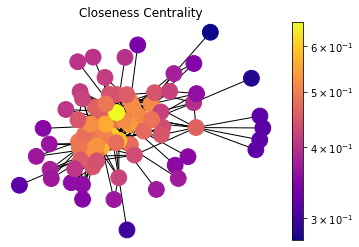

In [8]:
draw_net(g, pos, closeness, 'Closeness Centrality')

### Betweenness Centrality

Number of shortest paths that go through  a node.

**Assumption:** important vertices are bridges over which information flows

**Practically:** if information spreads via shortest paths, important nodes are found on many shortest paths


In [9]:
betweenness = nx.betweenness_centrality(g) # compute the betweenness centraliry of all nodes 

In [38]:
ranks = [(k, v) for k, v in sorted(betweenness.items(), key=lambda item: -item[1])]
ranks[0:5]

[('JON', 0.2373623977811749),
 ('DAENERYS', 0.11515170195132578),
 ('CERSEI', 0.11205674388253954),
 ('SAM', 0.10441836533706127),
 ('SANSA', 0.09108866886217318)]

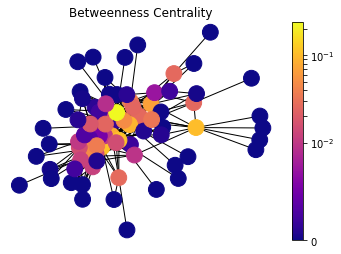

In [10]:
draw_net(g, pos, betweenness, 'Betweenness Centrality')

### Harmonic Centrality

Harmonic mean of the geodesic (shorted paths) distances from a given node to all others.


In [11]:
harmonic = nx.harmonic_centrality(g)

In [39]:
ranks = [(k, v) for k, v in sorted(harmonic.items(), key=lambda item: -item[1])]
ranks[0:5]

[('JON', 60.83333333333334),
 ('TYRION', 55.83333333333335),
 ('DAENERYS', 55.33333333333336),
 ('CERSEI', 53.916666666666686),
 ('DAVOS', 51.83333333333336)]

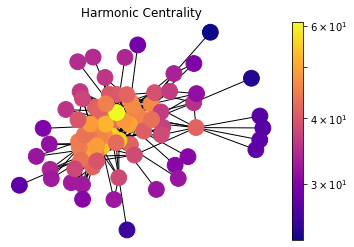

In [12]:
draw_net(g, pos, harmonic, 'Harmonic Centrality')

### PageRank 

**Main idea:** The PageRank computation can be interpreted as a Random Walk process with restart

Probability that the RW will be in node i next step depends only on the current node j and the transition probability
 j ➝ i determined by the stochastic matrix
- Consequently this is a first-order Markov process
- Stationary probabilities (i.e., when walk length tends towards ∞ ) of the RW to be in node i gives the PageRank of the node


In [13]:
pagerank = nx.pagerank(g)

In [40]:
ranks = [(k, v) for k, v in sorted(pagerank.items(), key=lambda item: -item[1])]
ranks[0:5]

[('JON', 0.04881727542311829),
 ('DAENERYS', 0.037486605613903635),
 ('TYRION', 0.035123365523226154),
 ('CERSEI', 0.033693769749151316),
 ('SANSA', 0.029421494591443928)]

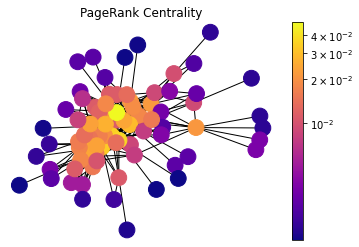

In [14]:
draw_net(g, pos, pagerank, 'PageRank Centrality')

### Eigenvector Centrality

A pair of eigenvector (x) and eigenvalue (λ) is defined by the relation:

    Ax = λx

- x is a vector of size N that can be interpreted as the nodes scores
- Ax yield a new vector of the same size which corresponds for each node to the sum of the received scores from its neighbors
- the equality implies that the new scores are proportional to the previous ones


In [15]:
eigen = nx.eigenvector_centrality(g)

In [41]:
ranks = [(k, v) for k, v in sorted(eigen.items(), key=lambda item: -item[1])]
ranks[0:5]

[('JON', 0.28574816760405874),
 ('TYRION', 0.26433391631897746),
 ('DAENERYS', 0.25255129335559284),
 ('DAVOS', 0.2400781968420038),
 ('CERSEI', 0.2318497048304332)]

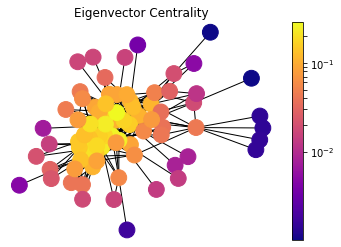

In [16]:
draw_net(g, pos, eigen, 'Eigenvector Centrality')

## Assortative Mixing

**Homophily** Property of (social) networks that nodes of the same attitude tends to be connected with
a higher probability than expected

It appears as correlation between vertex properties of x(i) and x(j) if (i,j) ∈ E


**Disassortative mixing:**
Contrary of homophily: dissimilar nodes tend to be connected 
(e.g., sexual networks, predator-prey)



### Network wide (global) Assortativity measures

#### Newman's Assortativity

Quantify homophily while scalar node properties are involved (e.g., degree)

*Degree assortative*
- Nodes tends to connect homogeneously w.r.t. their degree (e.g., hubs with hubs)

*Degree disassortative*
- Nodes tends to connect in a star-like topology


In [17]:
nx.degree_assortativity_coefficient(g)

-0.12111540434737612

#### KNNK

*What's the expected neighbors' degree of a node given its degree?*

In [18]:
knn = nx.k_nearest_neighbors(g) #calculate the average nearest neighbor degree of nodes with degree k.
knn = dict(sorted(knn.items()))

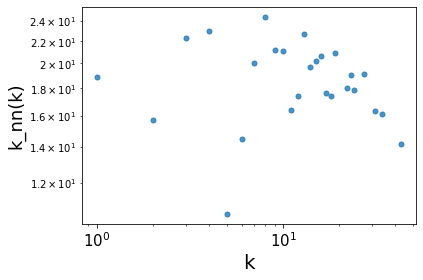

In [44]:
plt.plot(list(knn.keys()), list(knn.values()), '.', ms=10, alpha=0.8)
plt.loglog()
plt.xlabel("k", fontsize=20)
plt.ylabel("k_nn(k)",fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Newman Assortativity on node properties

Same as the standard Newman's assortativity but computed on semantic information attached to nodes (e.g., labels)

In [20]:
nx.attribute_assortativity_coefficient(g, 'label')

0.032698399589426566

### Node (local) Assortativity measures

**Idea:**
A local measure that captures the mixing patterns within the local neighbourhood of a given node.

### Multiscale Mixing Patterns

Conservative extension of Newman's Assortativity that, integrating over random walker processes with restart, estimate node wise assortativity scores.

(from https://github.com/piratepeel/MultiscaleMixing)

In [21]:
from MultiscaleMixing import loadNetwork
from MultiscaleMixing import localassort

In [24]:
# relabeling nodes starting from 0 (required by the algorithm)
mapping = {n: i for i, n in enumerate(g.nodes())}
g = nx.relabel_nodes(g, mapping)

to_save_net = open('data/tmp_net.txt', 'w')
to_save_labs = open('data/tmp_labels.txt', 'w')

for u, v in g.edges():
    to_save_net.write(str(u) + " " + str(v))
    to_save_net.write("\n")
to_save_net.close()    

for n in g.nodes():
    to_save_labs.write(g.nodes[n]['label'])
    to_save_labs.write("\n")
to_save_labs.close()

E, M = loadNetwork.load('data/tmp_net.txt', 'data/tmp_labels.txt', zero_index=0)

In [25]:
assortM, assortT, Z = localassort.localAssortF(E,M,pr=np.arange(0,1,0.1))

start iteration


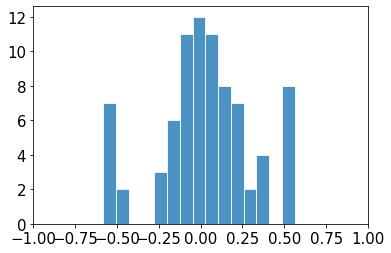

In [26]:
plt.hist(assortT, bins=15, alpha=0.8, edgecolor='white')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim((-1,1))
plt.show()

### Conformity

Assortativity measure that takes into account label homogeneity in shortest paths with distance tunable relevance decay.

(from https://github.com/GiulioRossetti/conformity)

    pip install node_conformity

In [27]:
from conformity import attribute_conformity
import pandas as pd

#calculate the conformity
alphas = [1.0, 2.0, 3.0, 4.0, 5.0] # decay factors
res = attribute_conformity(g, alphas, ['label'], profile_size=1)

100%|██████████| 81/81 [00:00<00:00, 737.73it/s]


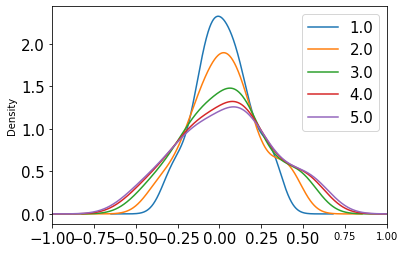

In [28]:
_, ax = plt.subplots()

for alpha, profiles in res.items():
    for profile, data in profiles.items():
        df = pd.DataFrame(list(data.values()), columns=[alpha])
        df.plot.kde(ax=ax)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim((-1,1))
plt.legend(fontsize=15)
plt.show()

Each kde identify the conformtity distribution for a different decay factor: the higher the alpha the more local the computed value for each node.